In [ ]:
from skimage import io

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision as tv
import torchvision.models as models
import torchvision.transforms as transforms

import os
import numpy as np

from keras.preprocessing import image

from matplotlib import pyplot as plt

import pdb;

In [87]:
#model = torchvision.models.resnet50()
# resnet50 = models.SqueezeNet()
resnet50 = models.resnet50(pretrained = True)

In [88]:
# Read the image from localhost
img_path = '/Users/mickey/PycharmProjects/TestSocket/image/dog1.png'
img = image.load_img(img_path, target_size=(224, 224))

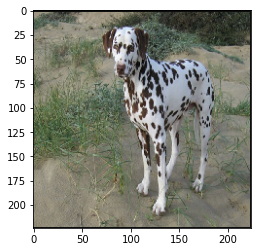

In [89]:
plt.imshow(img)

In [90]:
image = transforms.ToTensor()(img)
image = transforms.Normalize(meam = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])(image)
image = image[None]

In [91]:
outputs = resnet50(image)
print(outputs.shape)  # (1,1000)
# print(outputs)

torch.Size([1, 1000])


In [92]:
outputs = torch.stack([nn.Softmax(dim=0)(i) for i in outputs])
outputs = outputs.mean(0)

In [93]:
top_k=10 #Got the first 10 indexs of classes

outputs_numpy = outputs.detach().numpy()

# print(type(outputs_numpy))

top_k_idx = outputs_numpy.argsort()[::-1][0:top_k]

print(top_k_idx)
print(outputs_numpy[top_k_idx])

[463 600 852 731 700 733 728 676 618 899]
[0.00577467 0.00572583 0.00564139 0.00498939 0.00399738 0.00388405
 0.00384774 0.00381576 0.00361141 0.00360536]


In [65]:
# p, preds = torch.max(outputs, 0)
# print(p)
# print(preds)
# print(p.data.cpu().item())
# print(preds.data.cpu().item())

